# 30 Day Map Challenge

## Day 1 - Points

Plan: To plot the locations of volcanoes around the world

In [11]:
import geopandas as gpd
import os
import pandas as pd

Setting the Working Directory

In [12]:
os.getcwd()
os.chdir("c:\\Users\\vicks\\OneDrive\\Data Science (not uni)\\Portfolio\\30 Day Map Challenge\\30 Day Map Challenge Data\\volcano data")

Importing Data

_Originally found at:_

_[Volcano Data](https://www.kaggle.com/datasets/ramjasmaurya/volcanoes-on-earth-in-2021)_

_[World Map](https://www.naturalearthdata.com/downloads/10m-cultural-vectors/)_

In [13]:
volcanoes_df = pd.read_csv("volcanoes around the world in 2021.csv")

In [14]:
volcanoes_df.head();

In [15]:
countries = gpd.read_file("ne_10m_admin_0_countries.shp")

In [16]:
print(countries.crs)

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


Converting the CSV file to a GeoDataFrame and setting the Coordinate Reference System (CRS) to the [ESPG 4326](https://epsg.io/4326) system (which corresponds to longitude and latitude co-ordinates).

In [17]:
# Conversion of the PD DataFrame to GeoDataFrame
volcanoes = gpd.GeoDataFrame(volcanoes_df, geometry=gpd.points_from_xy(volcanoes_df.Longitude, volcanoes_df.Latitude))

In [18]:
# Setting the CRS to EPSG 4326
volcanoes.crs = {'init': 'epsg:4326'}

c:\Users\vicks\mambaforge\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [19]:
volcanoes.head();

Building the map using geopandas

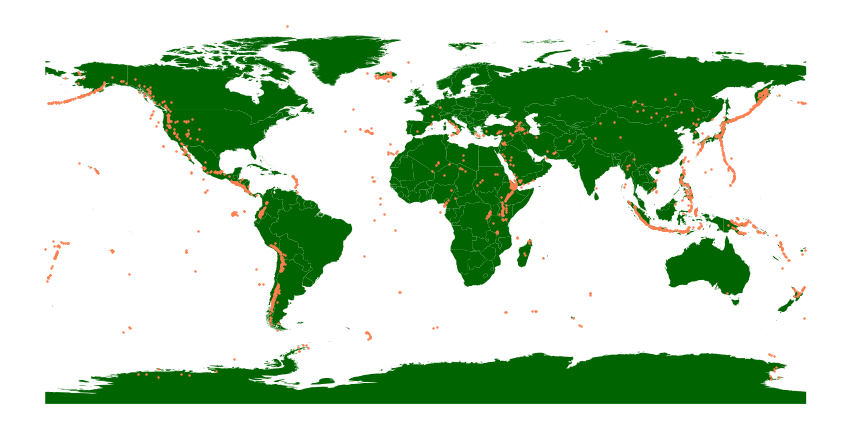

In [20]:
ax = countries.plot(figsize=(15,15), color='darkgreen')
volcanoes.plot( marker='o', color='coral', markersize=2, ax=ax)
ax.set_facecolor("darkblue")
ax.set_axis_off();